In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bishalgaire360","key":"69b39489849cd899eaa93339bad30cdb"}'}

In [0]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv

 92% 50.0M/54.4M [00:00<00:00, 143MB/s]
100% 54.4M/54.4M [00:00<00:00, 155MB/s]


In [0]:
from zipfile import ZipFile
def extract_zip(file):
  with ZipFile(file,'r') as zip:
    zip.extractall()
    print("Done extracting", file)

In [0]:
import os
def remove_zip(file):
  os.remove(file)
  print("Successfully deleted ",file)

In [6]:
zips = ["train.csv.zip"]
for zip in zips:
  extract_zip(zip)
  remove_zip(zip)

Done extracting train.csv.zip
Successfully deleted  train.csv.zip


In [0]:
import pandas as pd
train = pd.read_csv("train.csv")

Text(0, 0.5, 'No of questions')

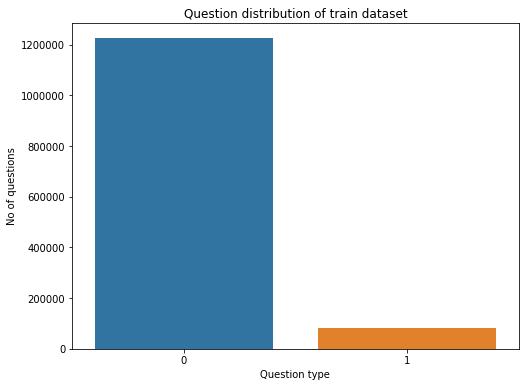

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
target_count = train["target"].value_counts()

plt.figure(figsize = (8, 6))
ax = sns.barplot(target_count.index, target_count.values)
ax.set_title("Question distribution of train dataset")
ax.set_xlabel("Question type")
ax.set_ylabel("No of questions")

In [0]:
train["quest_len"] = train["question_text"].apply(lambda x: len(x.split()))

In [0]:
sincere = train[train["target"] == 0]
insincere = train[train["target"] == 1]

Text(0.5, 1.0, 'Questions Length Distribution of both question')

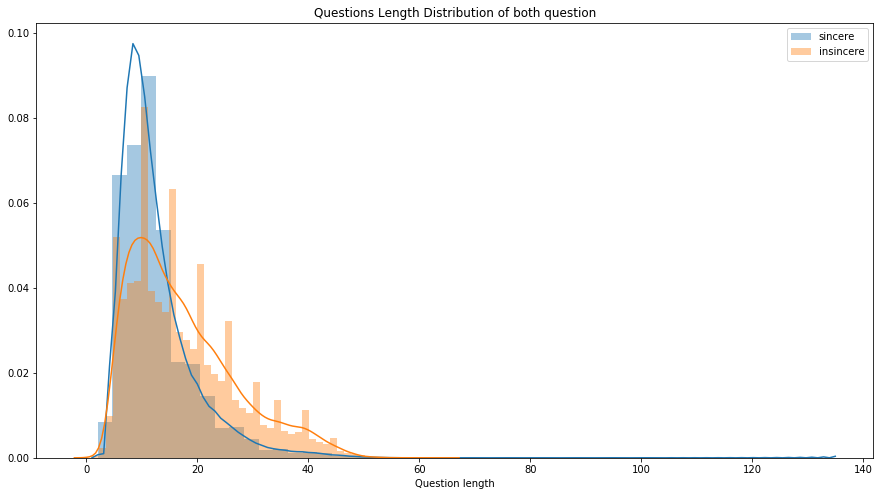

In [11]:

plt.figure(figsize = (15, 8))
sns.distplot(sincere["quest_len"], hist = True, label = "sincere")
sns.distplot(insincere["quest_len"], hist = True, label = "insincere")
plt.legend()
plt.xlabel("Question length")
plt.title("Questions Length Distribution of both question")

Text(0.5, 1.0, 'Questions Length Distribution of sincere question')

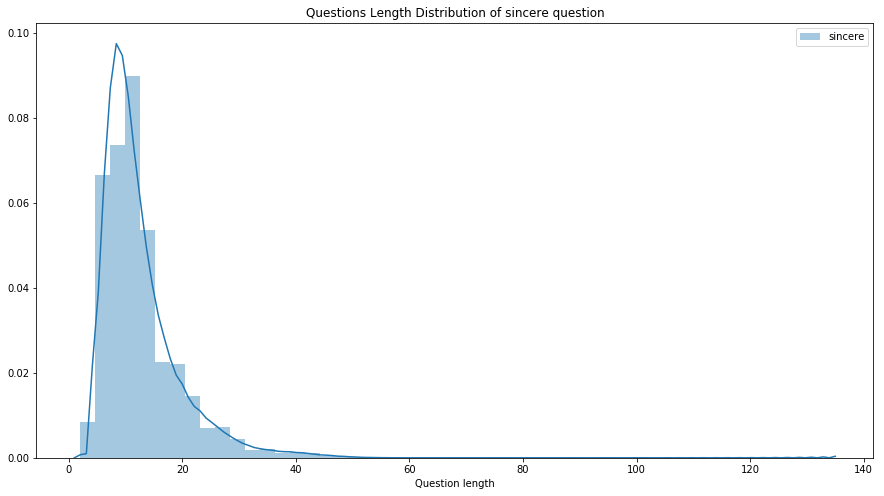

In [12]:
plt.figure(figsize = (15, 8))
sns.distplot(sincere["quest_len"], hist = True, label = "sincere")
plt.legend()
plt.xlabel("Question length")
plt.title("Questions Length Distribution of sincere question")

Text(0.5, 1.0, 'Questions Length Distribution of insincere question')

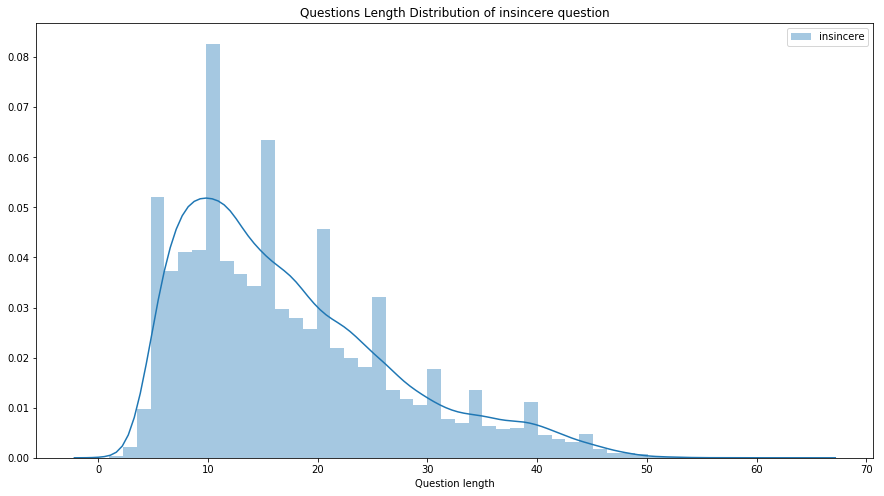

In [13]:
plt.figure(figsize = (15, 8))
sns.distplot(insincere["quest_len"], hist = True, label = "insincere")
plt.legend()
plt.xlabel("Question length")
plt.title("Questions Length Distribution of insincere question")

In [0]:
#pre processing
import re
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_text(x):
    x = str(x)
    for punct in puncts:
        x = x.replace(punct,'')
    return x

one_letter_word=[
    " a ",
    " b ",
    " c ",
    " d ",
    " e ",
    " f ",
    " g ",
    " h ",
    " i ",
    " j ",
    " k ",
    " l ",
    " m ",
    " n ",
    " o ",
    " p ",
    " q ",
    " r ",
    " s ",
    " t ",
    " u ",
    " v ",
    " w ",
    " x ",
    " y ",
    " z "
]

def clean_one_letter_word(x):
    x = str(x)
    for punct in one_letter_word:
        x = x.replace(punct,'')
    return x

def clean_numbers(x):
    x = re.sub('[0-9]{5,}', '', x)
    x = re.sub('[0-9]{4}', '', x)
    x = re.sub('[0-9]{3}', '', x)
    x = re.sub('[0-9]{2}', '', x)
    return x

mispell_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)
def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]
    return mispellings_re.sub(replace, text)

def preprocess(text):
  text = text.lower()
  text = clean_text(text)
  text = clean_one_letter_word(text)
  text = clean_numbers(text)
  text = replace_typical_misspell(text)
  return text

In [15]:
sincere.head()

,qid,question_text,target,quest_len
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15


In [16]:
insincere.head()

,qid,question_text,target,quest_len
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1,11
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1,15
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1,15
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1,34
115,000537213b01fd77b58a,Which races have the smallest penis?,1,6


In [0]:
from tqdm import tqdm
tqdm.pandas()

In [18]:
sincere["question_text"] = sincere["question_text"].progress_apply(preprocess)
insincere["question_text"] = insincere["question_text"].progress_apply(preprocess)

100%|██████████| 1225312/1225312 [01:35<00:00, 12875.56it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
100%|██████████| 80810/80810 [00:07<00:00, 10559.83it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
sincere.head()

,qid,question_text,target,quest_len
0,00002165364db923c7e6,how did quebec nationalists see their province...,0,13
1,000032939017120e6e44,do you have an adopted dog how would you encou...,0,16
2,0000412ca6e4628ce2cf,why does velocity affect time does velocity af...,0,10
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0,9
4,0000455dfa3e01eae3af,canconvert montra helicontomountain bike by ju...,0,15


In [20]:
insincere.head()

,qid,question_text,target,quest_len
22,0000e91571b60c2fb487,has the united states become the largest dicta...,1,11
30,00013ceca3f624b09f42,which babies are more sweeter to their parents...,1,15
110,0004a7fcb2bf73076489,if blacks support school choice and mandatory ...,1,15
114,00052793eaa287aff1e1,i am gay boy andlove my cousin boy he is sexy ...,1,34
115,000537213b01fd77b58a,which races have the smallest penis,1,6


In [0]:
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def create_wordcloud(data,title):
  nltk.download('punkt')
  question_text = data.question_text.str.cat(sep=' ')#function to split text into word
  tokens = word_tokenize(question_text)
  vocabulary = set(tokens)
  print(len(vocabulary))
  stop_words = set(STOPWORDS)
  tokens = [w for w in tokens if not w in stop_words]
  frequency_dist = nltk.FreqDist(tokens)
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate_from_frequencies(frequency_dist)
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud)
  plt.title(title) 
  plt.axis("off")
  plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
64113


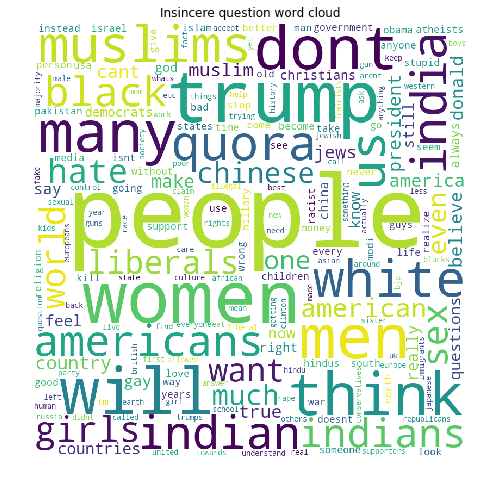

In [22]:
create_wordcloud(insincere,"Insincere question word cloud")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
431143


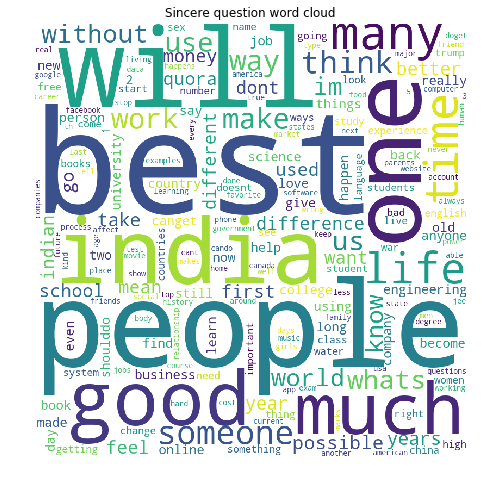

In [23]:
create_wordcloud(sincere,"Sincere question word cloud")